In [1]:
import tensorflow.keras as keras
import numpy as np 
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

## Preparing the data

## Encoding the input data

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## Encoding the labels

In [4]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [5]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Building your model

In [31]:
model = Sequential([
    Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation="relu", kernel_regularizer=l2(0.004)),
    Dropout(0.3),
    Dense(46, activation="softmax")
])

## Compiling the model

In [22]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## Validating your approach

## Setting aside a validation set

In [23]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## Training the model

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.2801 - loss: 5.4105 - val_accuracy: 0.6050 - val_loss: 2.7909
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.5886 - loss: 2.6715 - val_accuracy: 0.6620 - val_loss: 2.0509
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6533 - loss: 2.0764 - val_accuracy: 0.7010 - val_loss: 1.8380
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6862 - loss: 1.8724 - val_accuracy: 0.6970 - val_loss: 1.7310
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7014 - loss: 1.7589 - val_accuracy: 0.7180 - val_loss: 1.6686
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7061 - loss: 1.7167 - val_accuracy: 0.7280 - val_loss: 1.6154
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7193 - loss: 1.6456 - val_accuracy: 0.7330 - val_loss: 1.5855
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7403 - loss: 1.5639 - val_accuracy: 0.7300 - v

## Plotting the training and validation loss

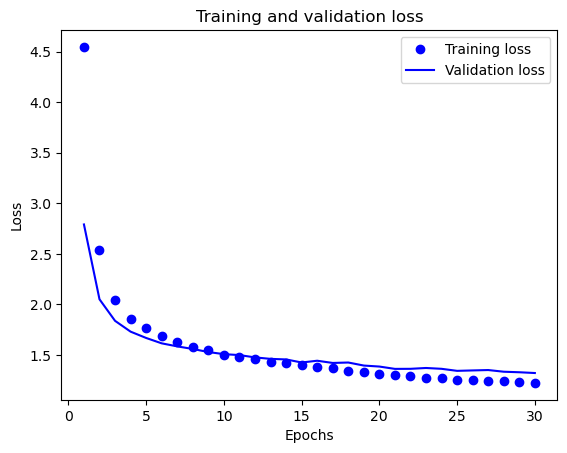

In [32]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Plotting the training and validation accuracy

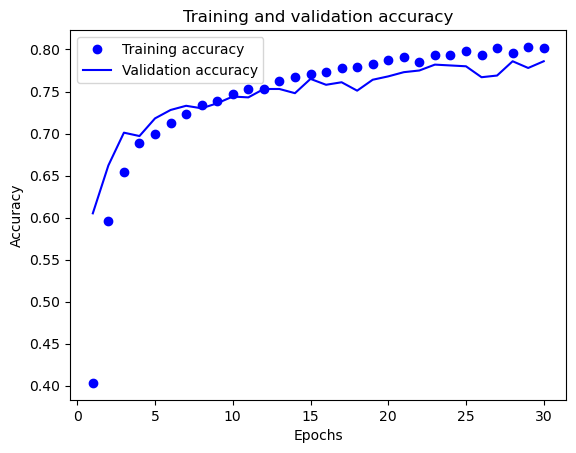

In [33]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()